<a href="https://colab.research.google.com/github/lprockop/NLPGroup10/blob/main/PrelimAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Final Project

## Last updated:
04/14/23, Lyle

### Current state:
  
Data is imported and eFMD scores are run.  
eFMD already includes necessary preprocessing steps (removing special characters and lowercasing letters) so those steps are kept in at the end in case we want to use them for other scorers/analyses.

Update as of 04/09:
- Ran vice-virtue scoring 
- Graphed sanctity.vice scores

### Note: 
After making any updates, please File > Save a Copy in GitHub to update the shared GitHub project

### Import data

In [4]:
#read in csvs (note: I've downloaded these from the Data Google folder and re-uploaded in this runtime)
import pandas as pd
nyt = pd.read_csv('first_1200_articles.csv').drop(columns='Unnamed: 0')
sc = pd.read_csv('Abortion_final.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

#add year column to NYT dataset
year = []
for i in nyt.pub_date:
  year.append(int(i[0:4]))
nyt['year'] = year

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

KeyboardInterrupt: ignored

### Sentiment analysis using eFMD

In [3]:
#install necessary modules
!pip install -U pip setuptools wheel
!pip install -U spacy==3.4.0
!python -m spacy download en_core_web_sm
!pip install git+https://github.com/medianeuroscience/emfdscore.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 83.2 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.7
    Uninstalling pydantic-1.10.7:
    

In [7]:
#import packages we'll need
import pandas as pd 
import numpy as np

In [8]:
#format text columns in the proper format for eFMD...
#...in NYT dataframe
template_input_nyt = pd.DataFrame(nyt['abstract']).sort_values('abstract', ascending=False).dropna()
template_input_nyt = template_input_nyt[template_input_nyt['abstract']!=''].sort_values('abstract').rename({'abstract':0}, axis=1)
template_input_nyt = template_input_nyt.reset_index().drop('index', axis=1)
#...in SC dataframe
template_input_sc = pd.DataFrame(sc['text']).sort_values('text', ascending=False).dropna()
template_input_sc = template_input_sc[template_input_sc['text']!=''].sort_values('text').rename({'text':0}, axis=1)
template_input_sc = template_input_sc.reset_index().drop('index', axis=1)

In [9]:
#import and run eFMD scoring
from emfdscore.scoring import score_docs 
num_docs_nyt = len(template_input_nyt)
num_docs_sc = len(template_input_sc)
DICT_TYPE = 'emfd'
PROB_MAP = 'all'
SCORE_METHOD = 'bow'
OUT_METRICS = 'sentiment'
#create new dfs to hold the results
df_nyt = score_docs(template_input_nyt, DICT_TYPE, PROB_MAP, SCORE_METHOD, OUT_METRICS, num_docs_nyt)
df_sc = score_docs(template_input_sc, DICT_TYPE, PROB_MAP, SCORE_METHOD, OUT_METRICS, num_docs_sc)
#combine dfs that hold the initial data with the results
nyt_df = pd.concat((nyt, df_nyt), axis=1)
sc_df = pd.concat((sc, df_sc), axis=1)
#examine output for SC
sc_df.head()

NLTK stopwords missing, downloading now.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Processed: 1189 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:16 Time:  0:00:16
Processed: 35 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:13 Time:  0:00:13


,Unnamed: 0.2,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,...,authority_p,sanctity_p,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var
0,0,Justice Blackmun,majority,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,...,0.104120,0.088544,-0.078838,-0.049894,-0.024090,-0.022071,-0.050575,0.881183,0.000073,0.000541
1,1,Justice O'Connor and Kennedy and Souter,majority,False,Planned Parenthood of Southeastern Pa. v. Casey,1992-06-29,NaN,https://www.courtlistener.com/opinion/112786/p...,NaN,1992,...,0.104372,0.092741,-0.071447,-0.045651,-0.026034,-0.034011,-0.047386,1.399520,0.000089,0.000296
2,2,Justice Stewart,concurring,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,...,0.104660,0.086185,-0.089379,-0.015917,-0.007430,-0.005189,-0.051946,1.174528,0.000169,0.001313
3,3,Justice Rehnquist,dissenting,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,...,0.104747,0.082228,-0.089115,-0.024546,-0.029659,-0.038441,-0.071355,1.054968,0.000187,0.000795
4,4,per_curiam,per_curiam,True,Poelker v. Doe,1977-06-20,NaN,https://www.courtlistener.com/opinion/109712/p...,https://www.courtlistener.com/api/rest/v3/clus...,1977,...,0.105832,0.086574,-0.080738,-0.044666,-0.030372,-0.028697,-0.051229,1.013566,0.000106,0.000443


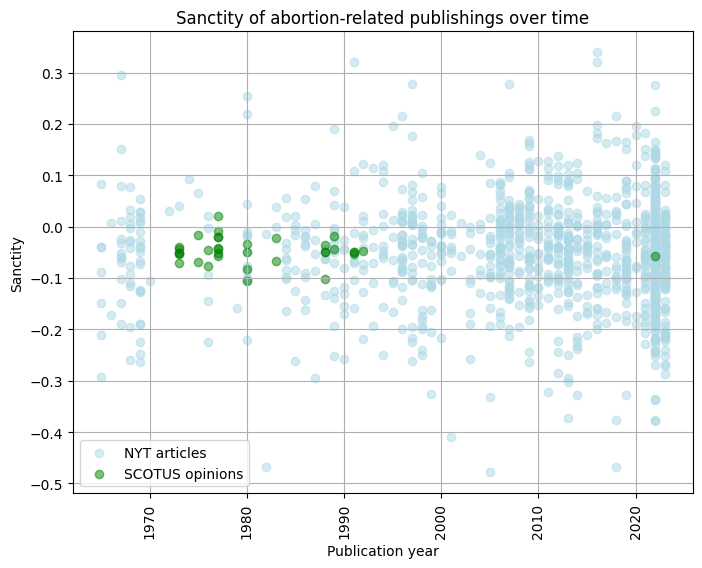

In [10]:
#visualize sanctity scores over time
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(nyt_df.year, nyt_df.sanctity_sent, alpha=0.5, color='lightblue', label='NYT articles')
plt.scatter(sc_df.year_filed, sc_df.sanctity_sent, alpha=0.5, color='green', label='SCOTUS opinions')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity')
plt.title('Sanctity of abortion-related publishings over time')
plt.grid()
plt.show()

In [11]:
# running vice virtue analysis

from emfdscore.scoring import score_docs 

num_docs_nyt = len(template_input_nyt)
num_docs_sc = len(template_input_sc)

DICT_TYPE = 'mfd'
PROB_MAP = 'all'
SCORE_METHOD = 'bow'
OUT_METRICS = ''

#create new dfs to hold the results
df_nyt_v = score_docs(template_input_nyt, DICT_TYPE, PROB_MAP, SCORE_METHOD, OUT_METRICS, num_docs_nyt)
df_sc_v = score_docs(template_input_sc, DICT_TYPE, PROB_MAP, SCORE_METHOD, OUT_METRICS, num_docs_sc)
#combine dfs that hold the initial data with the results
nyt_df_v = pd.concat((nyt, df_nyt_v), axis=1)
sc_df_v = pd.concat((sc, df_sc_v), axis=1).drop(columns=['Unnamed: 0.2'])
#examine output for SC
sc_df_v.head()

Processed: 1189 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:12 Time:  0:00:12
Processed: 35 100% |❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤| Elapsed Time: 0:00:19 Time:  0:00:19


,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,...,authority.virtue,sanctity.virtue,care.vice,fairness.vice,loyalty.vice,authority.vice,sanctity.vice,moral,moral_nonmoral_ratio,f_var
0,Justice Blackmun,majority,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,1972-048,...,0.332061,0.011450,0.039440,0.013995,0.017812,0.113232,0.003817,0.134860,0.058657,0.010225
1,Justice O'Connor and Kennedy and Souter,majority,False,Planned Parenthood of Southeastern Pa. v. Casey,1992-06-29,NaN,https://www.courtlistener.com/opinion/112786/p...,NaN,1992,1991-117,...,0.267380,0.010695,0.117647,0.030303,0.035651,0.049911,0.003565,0.160428,0.066548,0.006358
2,Justice Stewart,concurring,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,1972-048,...,0.125000,0.000000,0.062500,0.000000,0.000000,0.093750,0.000000,0.187500,0.074592,0.007172
3,Justice Rehnquist,dissenting,False,Roe v. Wade,1973-01-22,NaN,https://www.courtlistener.com/opinion/108713/r...,https://www.courtlistener.com/api/rest/v3/clus...,1973,1972-048,...,0.209877,0.074074,0.098765,0.000000,0.012346,0.086420,0.012346,0.185185,0.043478,0.006070
4,per_curiam,per_curiam,True,Poelker v. Doe,1977-06-20,NaN,https://www.courtlistener.com/opinion/109712/p...,https://www.courtlistener.com/api/rest/v3/clus...,1977,1976-157,...,0.310000,0.000000,0.000000,0.010000,0.040000,0.030000,0.010000,0.200000,0.050556,0.011366


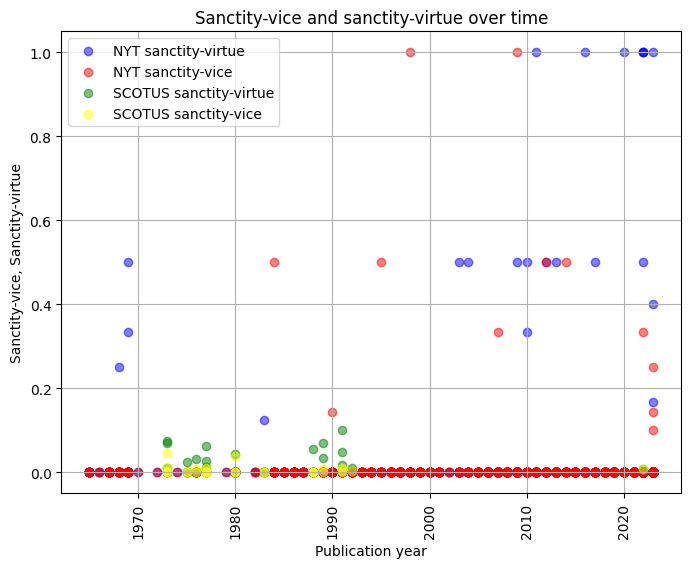

In [12]:
#visualize sanctity.vice over time
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(nyt_df.year, nyt_df_v['sanctity.virtue'], alpha=0.5, color='blue', label='NYT sanctity-virtue')
plt.scatter(nyt_df.year, nyt_df_v['sanctity.vice'], alpha=0.5, color='red', label='NYT sanctity-vice')
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.virtue'], alpha=0.5, color='green', label='SCOTUS sanctity-virtue')
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.vice'], alpha=0.5, color='yellow', label='SCOTUS sanctity-vice')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice, Sanctity-virtue')
plt.title('Sanctity-vice and sanctity-virtue over time')
plt.grid()
plt.savefig('san_vice_san_virtue.png')
plt.show()

# Prediction model

Given a corpus, what is the predicted sanctity score?

In [16]:
from google.colab import files

In [21]:
files.upload()

Saving utils _11.py to utils _11 (1).py


{'utils _11.py': b'# -*- coding: utf-8 -*-\r\n"""\r\nCreated on Mon Feb 13 18:43:11 2023\r\n\r\n@author: pathouli\r\n"""\r\n\r\ndef clean_text(str_in):\r\n    import re\r\n    tmp = re.sub("[^A-Za-z\']+", " ",str_in).lower().strip().replace("  ", " ")\r\n    return tmp\r\n\r\ndef file_clean(path_in):\r\n    f = open(path_in, encoding="UTF-8")\r\n    tmp = f.read()\r\n    f.close()\r\n    tmp = clean_text(tmp)\r\n    return tmp\r\n\r\ndef read_files(path_in):\r\n    import os\r\n    import pandas as pd\r\n    file_list = pd.DataFrame()\r\n    for root, dirs, files in os.walk(path_in, topdown=False):\r\n        for name in files:\r\n            try:\r\n                t_path = root + "/" + name\r\n                file_p = file_clean(t_path)\r\n                t_p = root.split("/")[-1:][0]\r\n                if len(file_p) > 0:\r\n                    file_list = file_list.append(\r\n                        {"body": file_p, "label": t_p\r\n                         }, ignore_index=True)\r\n

In [22]:
import utils_11

ModuleNotFoundError: ignored

In [ ]:
#CLEAN TEXT

df = pd.concat((sc_df[['text', 'sanctity_sent']], 
                nyt_df[['abstract', 'sanctity_sent']].rename(columns={'abstract':'text'})), 
               axis=0, ignore_index=True).dropna(how='any', axis=0)

print(df.shape)

text_clean = []
for i in df['text']:
    try:
        text_clean.append(clean_text(i))
    except:
        print(i)
df['text_clean'] = text_clean

In [ ]:
#remove stopwords
df['text_remsw'] = df['text_clean'].apply(rem_sw)

#stem (this uses PorterStemmer)
df['text_stem'] = df['text_remsw'].apply(stem_fun)

#turn each corpus into df?

#vectorize
vec = vec_fun(df['text_stem'], 1, 1, 'tfidf', '')

#train test split df
X = vec
y = df['sanctity_sent']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

#train RF model on train set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train, y_train)

#score RF model on test set
print(rf.score(X_test, y_test))
print(rf.feature_importances_)
print(sorted(rf.feature_importances_)[::-1][:3])

In [ ]:
#tune hyperparams
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [10, 20, 30],
             'max_depth' : [10, 20, 30]}

grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5).fit(X_train, y_train)
print('Best params: {}'.format(grid.best_params_))
print('Train set score: {}'.format(grid.score(X_train, y_train)))
print('Test set score: {}'.format(grid.score(X_test, y_test)))

# Archive

## Data cleaning (not necessary for eFMD)

In [ ]:
def clean_text(str_in):
    import re
    tmp = re.sub(r'[^\w]', " ",str_in).lower().strip().replace("  ", " ")
    return tmp

#### Clean NYT abstract

In [ ]:
abs_clean = []
for i in nyt.abstract:
  try:
    abs_clean.append(clean_text(i))
  except:
    abs_clean.append('')

nyt['abstract_clean'] = abs_clean
nyt = nyt[['pub_date', 'abstract_clean']]
nyt.head()

#### Clean Supreme Court decisions

In [ ]:
text_clean = []
for i in sc.text:
  try:
    text_clean.append(clean_text(i))
  except:
    text_clean.append('')

sc['text_clean'] = text_clean
sc = sc[['year_filed', 'text_clean']]
sc.head()

### Plotting all variables

In [ ]:
import matplotlib.pyplot as plt

metrics = ['care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p', 
'care_sent', 'fairness_sent', 'loyalty_sent', 'authority_sent',
'sanctity_sent', 'moral_nonmoral_ratio', 'f_var', 'sent_var']

for i in metrics:
  plt.figure(figsize=(6, 4))
  plt.scatter(nyt_df.year, nyt_df[i], alpha=0.5, color='lightblue', label='NYT articles')
  plt.scatter(sc_df.year_filed, sc_df[i], alpha=0.5, color='green', label='SCOTUS opinions')
  plt.legend()
  plt.xticks(rotation=90)
  plt.xlabel('Publication year')
  plt.ylabel(str(i))
  plt.title('{} of abortion-related NYC articles and SCOTUS opinions over time'.format(str(i)))
  plt.grid()
  plt.savefig('{}overtime.png'.format(str(i)))
  plt.show()

#### Note: scores that are calculated:


```
'care_p', 'fairness_p', 'loyalty_p', 'authority_p', 'sanctity_p', 
'care_sent', 'fairness_sent', 'loyalty_sent', 'authority_sent',
'sanctity_sent', 'moral_nonmoral_ratio', 'f_var', 'sent_var'
```

In [ ]:
#visualize sanctity.vice over time
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(nyt_df.year, nyt_df_v['sanctity.vice'], alpha=0.5, color='lightblue', label='NYT sanctity vice score')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice scores')
plt.title('Sanctity-vice scores for the NYTimes over time')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(sc_df.year_filed, sc_df_v['sanctity.vice'], alpha=0.5, color='green', label='sanctity vice score')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Publication year')
plt.ylabel('Sanctity-vice scores')
plt.title('Sanctity-vice scores for the Supreme Court over time')
plt.grid()
plt.show()

## Scrapped idea for prediction model - given SCOTUS sanctity score in a given year, what will NYT sanctity score be?

In [ ]:
#subset dfs, group by year

sc_tmp = pd.concat((sc_df_v[['sanctity.virtue', 'sanctity.vice', 'year_filed']], sc_df[['sanctity_sent']]), axis=1)
sc_tmp.shape

nyt_tmp = pd.concat((nyt_df_v[['sanctity.virtue', 'sanctity.vice', 'year']], nyt_df[['sanctity_sent']]), axis=1)
nyt_tmp.shape

sc_tmp = sc_tmp.groupby('year_filed').max() #can change this to mean, median, min, etc.
nyt_tmp = nyt_tmp.groupby('year').max()

In [ ]:
import seaborn as sns
sns.regplot(data=sc_tmp, x=sc_tmp.index, y='sanctity_sent', label='sc sanctity sent')
sns.regplot(data=nyt_tmp, x=nyt_tmp.index, y='sanctity_sent', label='nyt sanctity sent')
plt.legend()
plt.show()